In [6]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import re

In [2]:
import pandas as pd

df = pd.read_csv(
    "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/COVID_002.2_metadata.csv",
    encoding="latin1"   # or "ISO-8859-1"
)
df.to_csv(
    "/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/COVID_002.2_metadata.tsv",
    sep="\t",
    index=False
)


In [13]:
path = Path ("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Count_Matrices")
f = "AC04_S1_countmatrix.csv"

cm = pd.read_csv(path / f)

In [25]:
wt_spike = ['YLQPRTFLL_R1', 'YLQPRTFLL_R2']

# order cm by the column called the first item in wt_spike
cm = cm.sort_values(by=wt_spike[0], ascending=False)
cm

,barcode,tra_trb_full_vdj,tra_trb_cdr3,size,clonotype,junction_aa,junction,v_call,d_call,j_call,...,YLQPRTFCL_R2,YLQPRTFLI_R1,YLQPRTFLI_R2,YLQPRTFLA_R1,YLQPRTFLA_R2,negative,empty,LLLDRLNQL_positive,totalseq_control,totalseq_CD8
10494,GGTAAAGGTGCTATAA-1,TRA:ACCCAGCTGCTGGAGCAGAGCCCTCAGTTTCTAAGCATCCAA...,TRA:GCAGGAGCTATCCAGGCAGGAACTGCTCTGATC;TRA:GTGG...,343.0,4.0,TRB:CARQDGNTGELFF;TRA:CAGAIQAGTALIF;TRA:CVVNGN...,TRB:TGTGCCAGGCAGGACGGGAACACCGGGGAGCTGTTTTTT;TR...,"TRBV12-3*01,TRAV27*01,TRAV12-1*01","nan,nan,nan","TRBJ2-2*01,TRAJ15*01,TRAJ43*01",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7340,CGTAATAGTGGCGGTT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7858,CTAGCAGGTCAGGCCG-1,TRA:CGGAAGGAGGTGGAGCAGGATCCTGGACCCTTCAATGTTCCA...,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,TRB:CATQDENTGELFF;TRB:CAQGDQNTGELFF;TRB:CSAETS...,TRB:TGTGCCACCCAGGACGAGAACACCGGGGAGCTGTTTTTT;TR...,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",...,0.0,32.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2461,AGCCCTTGTAGTCGGC-1,TRA:CGGAAGGAGGTGGAGCAGGATCCTGGACCCTTCAATGTTCCA...,TRA:CTCGTGGGTGAGGTGGATGGCCAGAAGCTGCTC;TRA:GTGG...,1.0,2001.0,TRB:CASSPAGGGNTGELFF;TRB:CASSPDIAADF;TRA:CVVNK...,TRB:TGTGCCAGCAGCCCCGCAGGCGGAGGGAACACCGGGGAGCTG...,"TRBV5-4*01,TRBV7-9*01,TRAV12-1*01,TRAV4*01,TRA...","TRBD2*02,nan,nan,nan,nan,nan","TRBJ2-2*01,TRBJ2-7*01,TRAJ11*01,TRAJ16*02,TRAJ...",...,0.0,97.0,73.0,14.0,19.0,0.0,0.0,0.0,0.0,0.0
2349,AGAGGCGGTCAGTTGG-1,TRA:CGGAAGGAGGTGGAGCAGGATCCTGGACCCTTCAATGTTCCA...,TRA:GTGGTGAACAGAGATGACAAGATCATC;TRA:GTGGTGAACG...,1.0,1907.0,TRB:CSAETSRNVLSQFF;TRB:CASSSVNTGELFF;TRA:CVVNE...,TRB:TGCAGTGCTGAAACTAGCCGAAACGTCCTCTCGCAGTTCTTC...,"TRBV20-1*01,TRBV5-1*01,TRAV12-1*01,TRAV12-1*01","TRBD2*01,TRBD2*02,nan,nan,nan","TRBJ2-1*01,TRBJ2-2*01,TRAJ43*01,TRAJ30*01",...,0.0,15.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,AAACCATTCGCAATAT-1,TRB:GGTGCTGTCGTCTCTCAACATCCGAGCAGGGTTATCTGTAAG...,TRB:AGTGCTAGCCGGGACACTTACACTGAAGCTTTC,4.0,273.0,TRB:CSASRDTYTEAFF,TRB:TGCAGTGCTAGCCGGGACACTTACACTGAAGCTTTCTTT,TRBV20-1*01,TRBD1*01,TRBJ1-1*01,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12001,GTTGTCCGTGGAGCGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
11994,GTTGTATAGCAAGCGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
279,AACCACTCAGGACATA-1,TRA:GAGCTGAAAGTGGAACAAAACCCTCTGTTCCTGAGCATGCAG...,TRA:GCCGTGAACTTTGGAAATGAGAAATTAACC;TRB:GCCAGCA...,1.0,2207.0,TRB:CASSEINRSPEAFF;TRA:CAVNFGNEKLTF,TRB:TGCGCCAGCAGTGAGATTAACAGGAGCCCTGAAGCTTTCTTT...,"TRBV10-2*01,TRAV39*01","TRBD1*01,nan","TRBJ1-1*01,TRAJ48*01",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
# filter cm for only rows where the value in the column wt_spike[0] AND wt_spike[1] is greater than 10
cm_highconf = cm[(cm[wt_spike[0]] > 10) & (cm[wt_spike[1]] > 10)]

In [37]:
# see only the wt_spike columns
cm_highconf[[wt_spike[0], wt_spike[1]]]

,YLQPRTFLL_R1,YLQPRTFLL_R2
10494,366.0,16.0
7858,155.0,121.0
2461,134.0,92.0
2349,127.0,87.0
11312,123.0,115.0
...,...,...
10113,11.0,12.0
6708,11.0,12.0
1257,11.0,14.0
9156,11.0,12.0


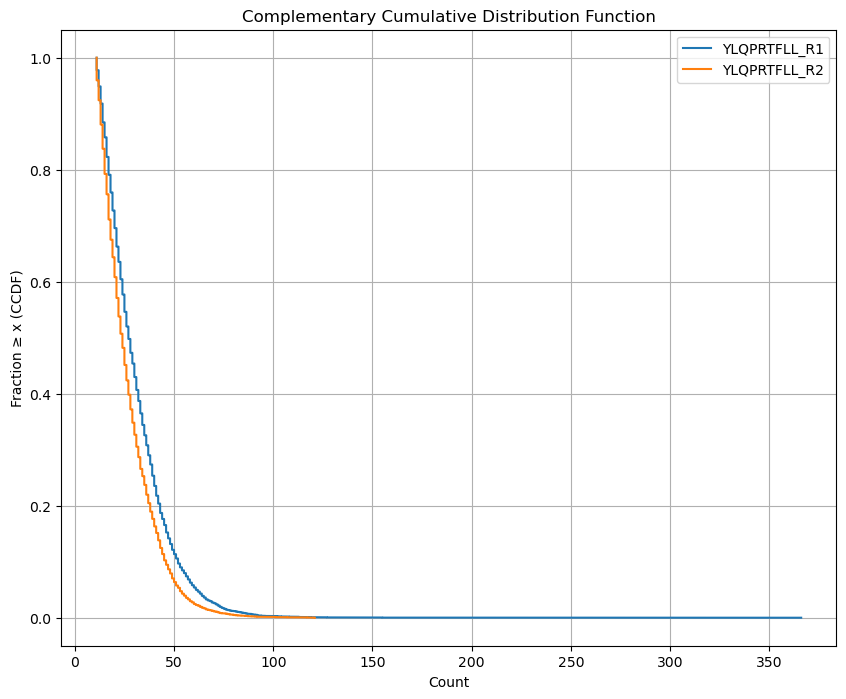

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Select the columns
data = cm_highconf[[wt_spike[0], wt_spike[1]]]

plt.figure(figsize=(10,8))

for col in data.columns:
    counts = data[col].values
    sorted_counts = np.sort(counts)
    ccdf = 1.0 - np.arange(1, len(sorted_counts)+1) / len(sorted_counts)
    
    plt.plot(sorted_counts, ccdf, drawstyle='steps-post', label=col)

plt.xlabel('Count')
plt.ylabel('Fraction ≥ x (CCDF)')
plt.title('Complementary Cumulative Distribution Function')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# count number of unique tra_trb_full_vdj in cm_highconf
unique_full = cm_highconf['tra_trb_full_vdj'].nunique()
unique_cdr3 = cm_highconf['tra_trb_cdr3'].nunique()

print(unique_full, unique_cdr3)

# print the counts of the 'clonotype' col
cm_highconf['clonotype'].value_counts()

1188 1168


clonotype
1.0       386
5.0       317
2.0       287
3.0       284
8.0       185
         ... 
1388.0      1
1164.0      1
1382.0      1
391.0       1
2887.0      1
Name: count, Length: 1188, dtype: int64

In [47]:
# check whether all cells with the same clonotype have the same v, d, j genes

# Check if all cells within each clonotype have the same V, D, J calls
v_variation = cm_highconf.groupby('clonotype')['v_call'].nunique()
d_variation = cm_highconf.groupby('clonotype')['d_call'].nunique()
j_variation = cm_highconf.groupby('clonotype')['j_call'].nunique()

# Identify clonotypes with more than one V, D, or J
v_mismatch = v_variation[v_variation > 1]
d_mismatch = d_variation[d_variation > 1]
j_mismatch = j_variation[j_variation > 1]

print("Clonotypes with >1 V call:", len(v_mismatch))
print("Clonotypes with >1 D call:", len(d_mismatch))
print("Clonotypes with >1 J call:", len(j_mismatch))

total_clonotypes = cm_highconf['clonotype'].nunique()

print("Total clonotypes:", total_clonotypes)

Clonotypes with >1 V call: 55
Clonotypes with >1 D call: 58
Clonotypes with >1 J call: 133
Total clonotypes: 1188


# Extract requried data
- For rows where count for WT_R1 AND WT_R2 are >10
- Only these cols: Barcode, tra_trb_cdr3, size, clonotype, junction_aa, v_call, d_call, j_call, YLQPRTFLL_R1, YLQPRTFLL_R2

In [73]:
cols = ['barcode', 'tra_trb_cdr3', 'size', 'clonotype', 'junction_aa', 'v_call', 'd_call', 'j_call', 'YLQPRTFLL_R1', 'YLQPRTFLL_R2']
cm_extracted = cm_highconf[cols]

In [65]:
cm_extracted

,barcode,tra_trb_cdr3,size,clonotype,junction_aa,v_call,d_call,j_call,YLQPRTFLL_R1,YLQPRTFLL_R2
10494,GGTAAAGGTGCTATAA-1,TRA:GCAGGAGCTATCCAGGCAGGAACTGCTCTGATC;TRA:GTGG...,343.0,4.0,TRB:CARQDGNTGELFF;TRA:CAGAIQAGTALIF;TRA:CVVNGN...,"TRBV12-3*01,TRAV27*01,TRAV12-1*01","nan,nan,nan","TRBJ2-2*01,TRAJ15*01,TRAJ43*01",366.0,16.0
7858,CTAGCAGGTCAGGCCG-1,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,TRB:CATQDENTGELFF;TRB:CAQGDQNTGELFF;TRB:CSAETS...,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",155.0,121.0
2461,AGCCCTTGTAGTCGGC-1,TRA:CTCGTGGGTGAGGTGGATGGCCAGAAGCTGCTC;TRA:GTGG...,1.0,2001.0,TRB:CASSPAGGGNTGELFF;TRB:CASSPDIAADF;TRA:CVVNK...,"TRBV5-4*01,TRBV7-9*01,TRAV12-1*01,TRAV4*01,TRA...","TRBD2*02,nan,nan,nan,nan,nan","TRBJ2-2*01,TRBJ2-7*01,TRAJ11*01,TRAJ16*02,TRAJ...",134.0,92.0
2349,AGAGGCGGTCAGTTGG-1,TRA:GTGGTGAACAGAGATGACAAGATCATC;TRA:GTGGTGAACG...,1.0,1907.0,TRB:CSAETSRNVLSQFF;TRB:CASSSVNTGELFF;TRA:CVVNE...,"TRBV20-1*01,TRBV5-1*01,TRAV12-1*01,TRAV12-1*01","TRBD2*01,TRBD2*02,nan,nan,nan","TRBJ2-1*01,TRBJ2-2*01,TRAJ43*01,TRAJ30*01",127.0,87.0
11312,GTCGCGGGTGGTATTA-1,TRA:GTGGTGAACAAGGAAGACAAACTGGTC;TRB:GCCAGCAGCT...,38.0,36.0,TRB:CASSLDIGAFF;TRA:CVVNKEDKLVF,"TRBV7-9*01,TRAV12-1*01","nan,nan","TRBJ1-1*01,TRAJ47*01",123.0,115.0
...,...,...,...,...,...,...,...,...,...,...
10113,GGCCTTGAGCTGTAGC-1,TRA:GCTGTGCGTAGCAGTGCTTCCAAGATAATC;TRA:GTGGTGA...,70.0,21.0,TRB:CASSERNTLEAFF;TRA:CAVRSSASKIIF;TRA:CVVNRDD...,"TRBV6-1*01,TRAV8-6*01,TRAV12-1*01","nan,nan,nan","TRBJ1-1*01,TRAJ3*01,TRAJ30*01",11.0,12.0
6708,CGACCCCGTCTATTGT-1,TRA:GCCCCGAACAGAGATGACAAGATCATC;TRB:GCCAGCAGCC...,1.0,649.0,TRB:CASSWDSEQYF;TRB:CASSSEGESYNSPLHF;TRB:CASSP...,"TRBV11-1*01,TRBV11-1*01,TRBV7-9*01,TRAV12-1*01","nan,TRBD1*01,TRBD2*02,nan,nan","TRBJ2-7*01,TRBJ1-6*01,TRBJ1-1*01,TRAJ30*01",11.0,12.0
1257,ACATAGAAGATCCGTA-1,TRA:GTGGTGAACGGGGGCAATGACATGCGC;TRB:GCCAGCAGTG...,137.0,13.0,TRB:CASSDLNTGELFF;TRA:CVVNGGNDMRF,"TRBV2*01,TRAV12-1*01","nan,nan","TRBJ2-2*01,TRAJ43*01",11.0,14.0
9156,GCGAAGGGTGGGTTAT-1,TRA:GTGGTGAACAAGGCGTATTCAGGAGGAGGTGCTGACGGACTC...,112.0,15.0,TRB:CASTSMDSMKAFF;TRA:CVVNKAYSGGGADGLTF,"TRBV4-2*01,TRAV12-1*01","TRBD1*01,nan","TRBJ1-1*01,TRAJ45*01",11.0,12.0


# exploring duplicated TRA and TRB

In [66]:
# how many unique tra_trb_cdr3 in cm_extracted
cm_extracted['junction_aa'].nunique()

1323

In [67]:
from collections import Counter

# Example: cm_extracted['junction_aa'] is a pandas Series of strings
# Each string looks like: "TRA:SEQ1;TRA:SEQ2;TRB:SEQ1"

counts = Counter()

for entry in cm_extracted['junction_aa'].dropna():
    parts = entry.split(';')
    tra_count = sum(1 for p in parts if p.startswith('TRA:'))
    trb_count = sum(1 for p in parts if p.startswith('TRB:'))
    key = f"TRA={tra_count},TRB={trb_count}"
    counts[key] += 1

# Display summary in sorted order
for k, v in sorted(counts.items()):
    print(f"{k}: {v}")


TRA=0,TRB=1: 233
TRA=0,TRB=2: 57
TRA=0,TRB=3: 16
TRA=0,TRB=4: 4
TRA=1,TRB=0: 96
TRA=1,TRB=1: 2770
TRA=1,TRB=2: 644
TRA=1,TRB=3: 191
TRA=1,TRB=4: 52
TRA=1,TRB=5: 6
TRA=1,TRB=6: 1
TRA=1,TRB=7: 1
TRA=2,TRB=0: 20
TRA=2,TRB=1: 675
TRA=2,TRB=2: 227
TRA=2,TRB=3: 103
TRA=2,TRB=4: 21
TRA=2,TRB=5: 9
TRA=2,TRB=6: 1
TRA=2,TRB=7: 1
TRA=3,TRB=0: 2
TRA=3,TRB=1: 35
TRA=3,TRB=2: 41
TRA=3,TRB=3: 29
TRA=3,TRB=4: 8
TRA=3,TRB=5: 4
TRA=4,TRB=1: 4
TRA=4,TRB=2: 30
TRA=4,TRB=3: 7
TRA=4,TRB=4: 6
TRA=4,TRB=5: 2
TRA=4,TRB=6: 1
TRA=5,TRB=0: 1
TRA=5,TRB=1: 1
TRA=5,TRB=2: 3
TRA=5,TRB=3: 1
TRA=5,TRB=4: 1
TRA=5,TRB=5: 1
TRA=6,TRB=2: 1
TRA=6,TRB=3: 1
TRA=6,TRB=4: 1


In [68]:
def find_cells_with_chain_count(cm_extracted, tra_n=None, trb_n=None):
    matches = []

    for idx, entry in cm_extracted['junction_aa'].dropna().items():
        parts = entry.split(';')
        tra_count = sum(1 for p in parts if p.startswith('TRA:'))
        trb_count = sum(1 for p in parts if p.startswith('TRB:'))

        if ((tra_n is None or tra_count == tra_n) and
            (trb_n is None or trb_count == trb_n)):
            matches.append(idx)

    return cm_extracted.loc[matches]

# Example usage:
# Find all cells with 1 TRA and 2 TRB
subset = find_cells_with_chain_count(cm_extracted, tra_n=1, trb_n=7)
subset


,barcode,tra_trb_cdr3,size,clonotype,junction_aa,v_call,d_call,j_call,YLQPRTFLL_R1,YLQPRTFLL_R2
2009,ACTCCCATCGTCAAAT-1,TRA:GTGGTGAACGGAGCCGACAAGCTCATC;TRB:GCCAGCAGCC...,1.0,1791.0,TRB:CASSPDVEAFF;TRB:CASSSDIEAFF;TRB:CASSPDILGF...,"TRBV7-9*01,TRBV7-9*01,TRBV7-9*01,TRBV7-9*01,TR...","nan,nan,TRBD1*01,nan,nan,TRBD1*01,TRBD2*01,TRB...","TRBJ1-1*01,TRBJ1-1*01,TRBJ2-1*01,TRBJ2-7*01,TR...",11.0,13.0


In [60]:
# print row 3060 col junction_aa
cm_extracted.at[2009, 'junction_aa']

'TRB:CASSPDVEAFF;TRB:CASSSDIEAFF;TRB:CASSPDILGFF;TRB:CASSWDSEQYF;TRB:CASSPDIAADF;TRB:CASSPDVEQYF;TRB:CASSSDIEAFF;TRA:CVVNGADKLIF'

# Extracting individual rows for unique TRBs

In [88]:
import pandas as pd

df = cm_extracted.copy()

na_count = df['junction_aa'].isna().sum()

def split_trb_rows(row):
    value = row['junction_aa']
    if not isinstance(value, str):
        return []
    trb_parts = [part for part in value.split(';') if part.startswith('TRB:')]
    rows = []
    for trb in trb_parts:
        new_row = row.copy()
        new_row['junction_aa'] = trb.replace('TRB:', '')
        rows.append(new_row)
    return rows

expanded_rows = [split_trb_rows(row) for _, row in df.iterrows()]
flattened_rows = [row for sublist in expanded_rows for row in sublist if sublist]

expanded_df = pd.DataFrame(flattened_rows)
expanded_df.reset_index(drop=True, inplace=True)


print(f"Missing junction_aa (NaN): {na_count}")
print(f"Retained rows with TRB sequences: {len(cm_extracted)}")


Missing junction_aa (NaN): 119
Retained rows with TRB sequences: 5427


In [91]:
# rename column junction_aa to amino_acid
expanded_df.rename(columns={'junction_aa': 'amino_acid'}, inplace=True)

In [93]:
# rename YLQPRTFLL_R1 and YLQPRTFLL_R2 to count_1 and count_2
expanded_df.rename(columns={'YLQPRTFLL_R1': 'count_1', 'YLQPRTFLL_R2': 'count_2'}, inplace=True)

In [98]:
# Compute average count
expanded_df['avg_count'] = expanded_df[['count_1', 'count_2']].mean(axis=1)

# Keep row with highest avg_count per amino_acid
highconf = expanded_df.loc[expanded_df.groupby('amino_acid')['avg_count'].idxmax()]

# Drop the helper column if not needed
highconf.drop(columns='avg_count', inplace=True)

highconf.reset_index(drop=True, inplace=True)
highconf.shape

(202, 10)

In [102]:
expanded_df

,barcode,tra_trb_cdr3,size,clonotype,amino_acid,v_call,d_call,j_call,count_1,count_2,avg_count
0,GGTAAAGGTGCTATAA-1,TRA:GCAGGAGCTATCCAGGCAGGAACTGCTCTGATC;TRA:GTGG...,343.0,4.0,CARQDGNTGELFF,"TRBV12-3*01,TRAV27*01,TRAV12-1*01","nan,nan,nan","TRBJ2-2*01,TRAJ15*01,TRAJ43*01",366.0,16.0,191.0
1,CTAGCAGGTCAGGCCG-1,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,CATQDENTGELFF,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",155.0,121.0,138.0
2,CTAGCAGGTCAGGCCG-1,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,CAQGDQNTGELFF,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",155.0,121.0,138.0
3,CTAGCAGGTCAGGCCG-1,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,CSAETSRNVLSQFF,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",155.0,121.0,138.0
4,AGCCCTTGTAGTCGGC-1,TRA:CTCGTGGGTGAGGTGGATGGCCAGAAGCTGCTC;TRA:GTGG...,1.0,2001.0,CASSPAGGGNTGELFF,"TRBV5-4*01,TRBV7-9*01,TRAV12-1*01,TRAV4*01,TRA...","TRBD2*02,nan,nan,nan,nan,nan","TRBJ2-2*01,TRBJ2-7*01,TRAJ11*01,TRAJ16*02,TRAJ...",134.0,92.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...
7277,CGACCCCGTCTATTGT-1,TRA:GCCCCGAACAGAGATGACAAGATCATC;TRB:GCCAGCAGCC...,1.0,649.0,CASSSEGESYNSPLHF,"TRBV11-1*01,TRBV11-1*01,TRBV7-9*01,TRAV12-1*01","nan,TRBD1*01,TRBD2*02,nan,nan","TRBJ2-7*01,TRBJ1-6*01,TRBJ1-1*01,TRAJ30*01",11.0,12.0,11.5
7278,CGACCCCGTCTATTGT-1,TRA:GCCCCGAACAGAGATGACAAGATCATC;TRB:GCCAGCAGCC...,1.0,649.0,CASSPDIEAFF,"TRBV11-1*01,TRBV11-1*01,TRBV7-9*01,TRAV12-1*01","nan,TRBD1*01,TRBD2*02,nan,nan","TRBJ2-7*01,TRBJ1-6*01,TRBJ1-1*01,TRAJ30*01",11.0,12.0,11.5
7279,ACATAGAAGATCCGTA-1,TRA:GTGGTGAACGGGGGCAATGACATGCGC;TRB:GCCAGCAGTG...,137.0,13.0,CASSDLNTGELFF,"TRBV2*01,TRAV12-1*01","nan,nan","TRBJ2-2*01,TRAJ43*01",11.0,14.0,12.5
7280,GCGAAGGGTGGGTTAT-1,TRA:GTGGTGAACAAGGCGTATTCAGGAGGAGGTGCTGACGGACTC...,112.0,15.0,CASTSMDSMKAFF,"TRBV4-2*01,TRAV12-1*01","TRBD1*01,nan","TRBJ1-1*01,TRAJ45*01",11.0,12.0,11.5


In [ ]:
highconf.sort_values(by='count_1', ascending=False, inplace=True)
highconf

,barcode,tra_trb_cdr3,size,clonotype,amino_acid,v_call,d_call,j_call,count_1,count_2
19,GGTAAAGGTGCTATAA-1,TRA:GCAGGAGCTATCCAGGCAGGAACTGCTCTGATC;TRA:GTGG...,343.0,4.0,CARQDGNTGELFF,"TRBV12-3*01,TRAV27*01,TRAV12-1*01","nan,nan,nan","TRBJ2-2*01,TRAJ15*01,TRAJ43*01",366.0,16.0
17,CTAGCAGGTCAGGCCG-1,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,CAQGDQNTGELFF,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",155.0,121.0
163,CTAGCAGGTCAGGCCG-1,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,CATQDENTGELFF,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",155.0,121.0
173,CTAGCAGGTCAGGCCG-1,TRA:GCCCCGCTGGTCGGAAAGCTGATT;TRA:GTGGTGAACAGAG...,1.0,1045.0,CSAETSRNVLSQFF,"TRBV7-8*01,TRBV7-8*01,TRBV20-1*01,TRAV12-1*01,...","nan,TRBD1*01,TRBD2*02,TRBD2*01,TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRBJ2-1*01,TRAJ30*01,TRA...",155.0,121.0
100,AGCCCTTGTAGTCGGC-1,TRA:CTCGTGGGTGAGGTGGATGGCCAGAAGCTGCTC;TRA:GTGG...,1.0,2001.0,CASSPDIAADF,"TRBV5-4*01,TRBV7-9*01,TRAV12-1*01,TRAV4*01,TRA...","TRBD2*02,nan,nan,nan,nan,nan","TRBJ2-2*01,TRBJ2-7*01,TRAJ11*01,TRAJ16*02,TRAJ...",134.0,92.0
...,...,...,...,...,...,...,...,...,...,...
157,CGAGCGTGTGCCATTC-1,TRA:GTGGTGAACAGGGAGGATGACATGCGC;TRB:GCCAGCACCG...,4.0,254.0,CASTGAEERNTGELFF,"TRBV2*01,TRAV12-1*01","nan,nan","TRBJ2-2*01,TRAJ43*01",13.0,15.0
64,GGCATATGTCGAGGCT-1,TRA:GCAGGAGCTATCCAGGCAGGAACTGCTCTGATC;TRA:GTGG...,1.0,1606.0,CASSEQNTGELFF,"TRBV12-3*01,TRBV2*01,TRAV12-1*01,TRAV12-1*01,T...","nan,nan,nan,nan,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRAJ40*01,TRAJ43*01,TRAJ...",12.0,23.0
150,CTACTTCAGCACTAGC-1,TRA:CCTCTTTCTGGTGGCTACAATAAGCTGATT;TRA:GTGGTGA...,1.0,1083.0,CASSYQDTGELFF,"TRBV7-9*01,TRBV7-9*01,TRBV6-2*01,TRAV6*01,TRAV...","nan,nan,nan,nan,nan","TRBJ1-1*01,TRBJ1-1*01,TRBJ2-2*01,TRAJ4*01,TRAJ...",12.0,17.0
154,GTCATCAAGGGCCTTG-1,TRA:GTGGTGAACCGAAACAATGACATGCGC;TRB:GCCAGCACGG...,1.0,1382.0,CASTADVNTGELFF,"TRBV5-4*01,TRBV5-4*01,TRAV12-1*01","TRBD2*02,nan,nan","TRBJ2-2*01,TRBJ2-2*01,TRAJ43*01",11.0,13.0


# Save highconf

In [107]:
# as tsv
highconf.to_csv('/Users/ishaharris/Projects/TCR/TCR-Isha/data/highconf/highconf_AC04_S1.tsv', sep = '\t', index=False)

# Basic heatmap
- Just to quickly inspect the outputs, didn't know where else to put it. 
- Will write a proper script for this tomorrow

In [ ]:
# ─────────────── BASIC CONFIG ───────────────
max_dist = 3
rep = 'emerson'
heatmap = f'AC04_S1_{rep}_top10000'
root_dir = f'/Users/ishaharris/Projects/TCR/TCR-Isha/data/heatmap_output/{heatmap}'
matrix_file = os.path.join(root_dir, f'all_dist_{max_dist}_matrix.csv')


In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ─────────────── BASIC CONFIG ───────────────
max_dist = 3
rep = 'covid'
highconf = 'random_olga'
heatmap = f'{highconf}_{rep}_top10000'
root_dir = f'/Users/ishaharris/Projects/TCR/TCR-Isha/data/heatmap_output/{heatmap}'
matrix_file = os.path.join(root_dir, f'all_dist_{max_dist}_matrix.csv')

# ─────────────── LOAD BURDEN MATRIX ───────────────
df = pd.read_csv(matrix_file, index_col='patient_id').T
df = df.apply(pd.to_numeric, errors='coerce').fillna(0.0)

# ─────────────── ORDER ROWS & COLUMNS BY TOTAL BURDEN ───────────────
row_burden = df.sum(axis=1)
col_burden = df.sum(axis=0)
df = df.loc[row_burden.sort_values(ascending=False).index,
            col_burden.sort_values(ascending=False).index]

# ─────────────── PLOT HEATMAP ───────────────
plt.figure(figsize=(12, 8))
im = plt.imshow(df.values, aspect='auto', cmap='viridis',
                vmin=df.values.min(), vmax=df.values.max())
plt.colorbar(im, label=f'Cumulative burden (dist ≤ {max_dist})')
plt.title(f'{heatmap} heatmap (dist ≤ {max_dist}), all repertoires')
plt.xlabel('Patients (sorted by total burden)')
plt.ylabel('Sequences (sorted by total burden)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

# ─────────────── SUMMARY STATISTICS ───────────────
patient_burden = df.sum(axis=0)

patient_stats = {
    "mean": np.mean(patient_burden),
    "std": np.std(patient_burden),
    "min": np.min(patient_burden),
    "max": np.max(patient_burden),
    "median": np.median(patient_burden),
    "25th_percentile": np.percentile(patient_burden, 25),
    "75th_percentile": np.percentile(patient_burden, 75),
}

print("─" * 60)
print(f"Summary statistics for patient total burdens ({heatmap}, dist ≤ {max_dist}):")
for k, v in patient_stats.items():
    print(f"{k:>20}: {v:.4f}")
print("─" * 60)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ishaharris/Projects/TCR/TCR-Isha/data/heatmap_output/random_olga_covid_top10000/all_dist_3_matrix.csv'

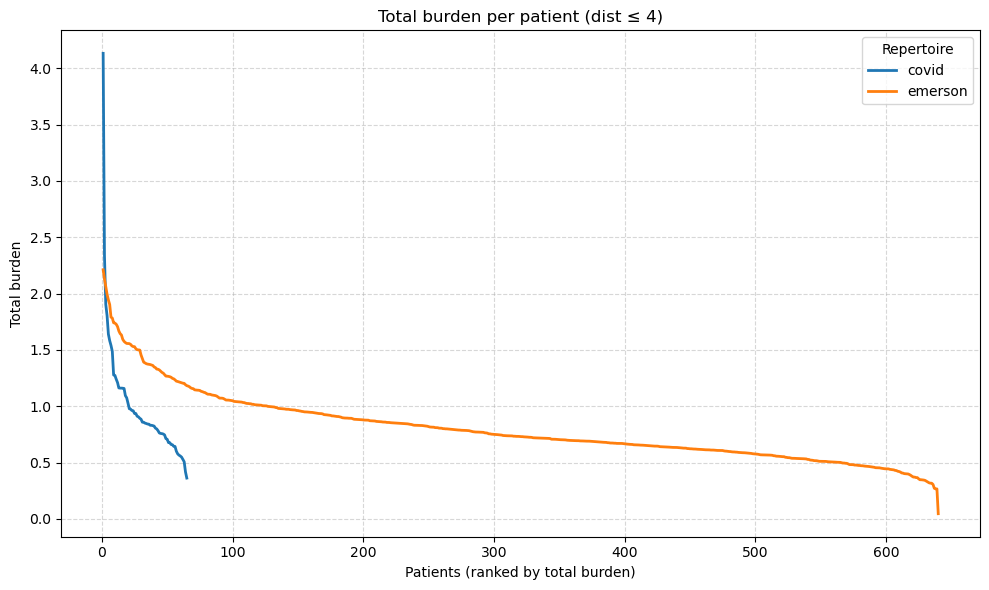

────────────────────────────────────────────────────────────
Summary statistics for covid (dist ≤ 4):
                mean: 0.9908
                 std: 0.5331
                 min: 0.3627
                 max: 4.1327
              median: 0.8504
     25th_percentile: 0.7125
     75th_percentile: 1.1581
────────────────────────────────────────────────────────────
Summary statistics for emerson (dist ≤ 4):
                mean: 0.7989
                 std: 0.3063
                 min: 0.0463
                 max: 2.2115
              median: 0.7309
     25th_percentile: 0.5982
     75th_percentile: 0.9455


In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ─────────────── BASIC CONFIG ───────────────
max_dist = 4
reps = ['covid', 'emerson']
base_dir = '/Users/ishaharris/Projects/TCR/TCR-Isha/data/heatmap_output'

patient_burden_data = {}

# ─────────────── LOAD AND COMPUTE BURDEN PER PATIENT ───────────────
for rep in reps:
    heatmap = f'AC04_S1_{rep}_top10000'
    matrix_file = os.path.join(base_dir, heatmap, f'all_dist_{max_dist}_matrix.csv')

    df = pd.read_csv(matrix_file, index_col='patient_id').T
    df = df.apply(pd.to_numeric, errors='coerce').fillna(0.0)

    # total burden per patient
    patient_burden_data[rep] = df.sum(axis=0)

# ─────────────── VISUALIZE DISTRIBUTIONS ───────────────
plt.figure(figsize=(10, 6))
for rep, burdens in patient_burden_data.items():
    burdens_sorted = np.sort(burdens.values)[::-1]
    plt.plot(
        np.arange(1, len(burdens_sorted) + 1),
        burdens_sorted,
        label=rep,
        lw=2
    )

plt.title(f'Total burden per patient (dist ≤ {max_dist})')
plt.xlabel('Patients (ranked by total burden)')
plt.ylabel('Total burden')
plt.legend(title='Repertoire')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ─────────────── PRINT SUMMARY STATS ───────────────
for rep, burdens in patient_burden_data.items():
    stats = {
        "mean": np.mean(burdens),
        "std": np.std(burdens),
        "min": np.min(burdens),
        "max": np.max(burdens),
        "median": np.median(burdens),
        "25th_percentile": np.percentile(burdens, 25),
        "75th_percentile": np.percentile(burdens, 75),
    }
    print("─" * 60)
    print(f"Summary statistics for {rep} (dist ≤ {max_dist}):")
    for k, v in stats.items():
        print(f"{k:>20}: {v:.4f}")


In [23]:
# ─────────────── FIND TOP 10 PATIENTS WITH HIGHEST BURDEN ───────────────
patient_burden = df.sum(axis=0)
top10 = patient_burden.sort_values(ascending=False).head(10)

print("Top 10 patients by total burden:")
print("─" * 60)
for rank, (pid, burden) in enumerate(top10.items(), start=1):
    print(f"{rank:>2}. {pid:<25} {burden:.4f}")
print("─" * 60)


Top 10 patients by total burden:
────────────────────────────────────────────────────────────
 1. P00590.tsv                0.6811
 2. P00642.tsv                0.5979
 3. P00253.tsv                0.5514
 4. P00459.tsv                0.5224
 5. P00277.tsv                0.4758
 6. P00441.tsv                0.4720
 7. P00426.tsv                0.4706
 8. P00575.tsv                0.4671
 9. P00095.tsv                0.4515
10. P00572.tsv                0.4485
────────────────────────────────────────────────────────────
